In [1]:
wsls <- function(c_j0,w_j0){
    # Win-Stay Lose-Switch for binary
    # alternatives/rewards
    # Loses are coded 0 and wins 1
    if(w_j0==0){b <- 1;a <- -1}
    else{b <- 0;a <- 1}
    c_j1 <- a*c_j0+b
    return(c_j1)
}

wsls(0,0)
wsls(0,1)
wsls(1,0)
wsls(1,1)

[1] 1

[1] 0

[1] 0

[1] 1

In [2]:
set.seed(10)
rewards <- rbinom(n=100,size=1,prob=0.50)
rewards

[1] 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 [38] 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 [75] 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0

In [3]:
#choices <- 1
wsls_responses <- function(rwrds,first_choice){
    choices <- first_choice
    for(i in 2:length(rwrds)){
        choices[i] <- wsls(choices[(i-1)],rwrds[(i-1)])
    }
    return(choices)
}
rewards
all(wsls_responses(rewards,1)!=wsls_responses(rewards,0))

[1] 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1
 [38] 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 [75] 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0

[1] TRUE

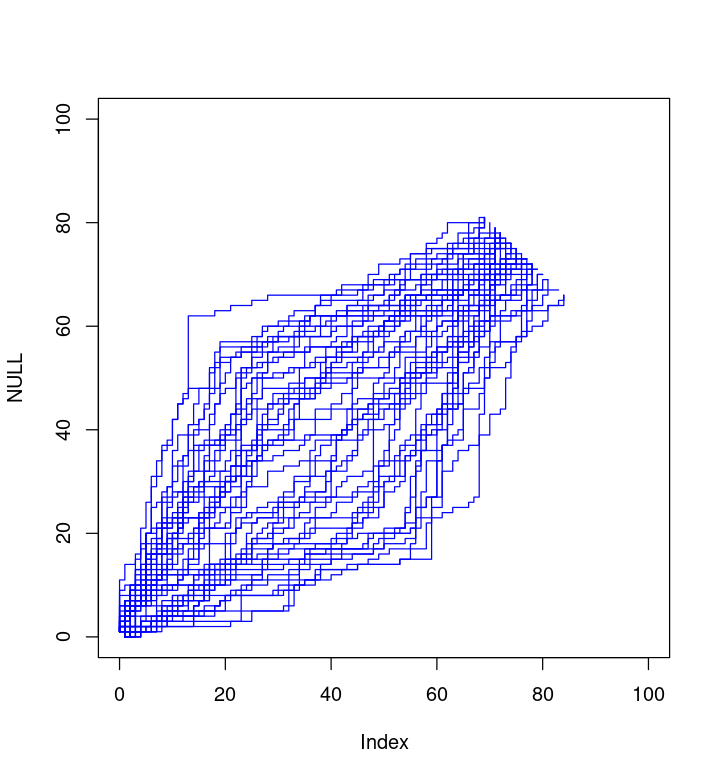

In [4]:
options(repr.plot.width=6,repr.plot.height=6.5)
plot(NULL,xlim=c(0,100),ylim=c(0,100))
theta <- seq(0.2,0.8,length.out = 50)
for(i in 1:length(theta)){
bin_seq <- c(rbinom(n=75,size=1,prob=theta[i]),
             rbinom(n=75,size=1,prob=1-theta[i]))
lines(cumsum(bin_seq==0),
       cumsum(bin_seq==1),col='blue')
}

In [35]:
run_lengths <- function(bin_seq){
	# Returns the length of each run of consecutive numbers
    # in any sequence of 0s and 1s
	switches <- c(bin_seq[1:(length(bin_seq)-1)]!=bin_seq[2:length(bin_seq)],NA)
	visit_ends <- which(switches)
	run_lengths <- visit_ends[1]
	run_lengths[2:length(visit_ends)] <- visit_ends[2:length(visit_ends)]-visit_ends[1:(length(visit_ends)-1)]
	
	start_1 <- as.numeric(bin_seq[1]==0)+1
	start_0 <- which(!(1:2)%in%start_1)
	run_lengths_1 <- run_lengths[seq(from=start_1,by=2,to=length(run_lengths))]
	run_lengths_0 <- run_lengths[seq(from=start_0,by=2,to=length(run_lengths))]
	return(list(run_lengths_1=run_lengths_1,
							run_lengths_0=run_lengths_0))
}

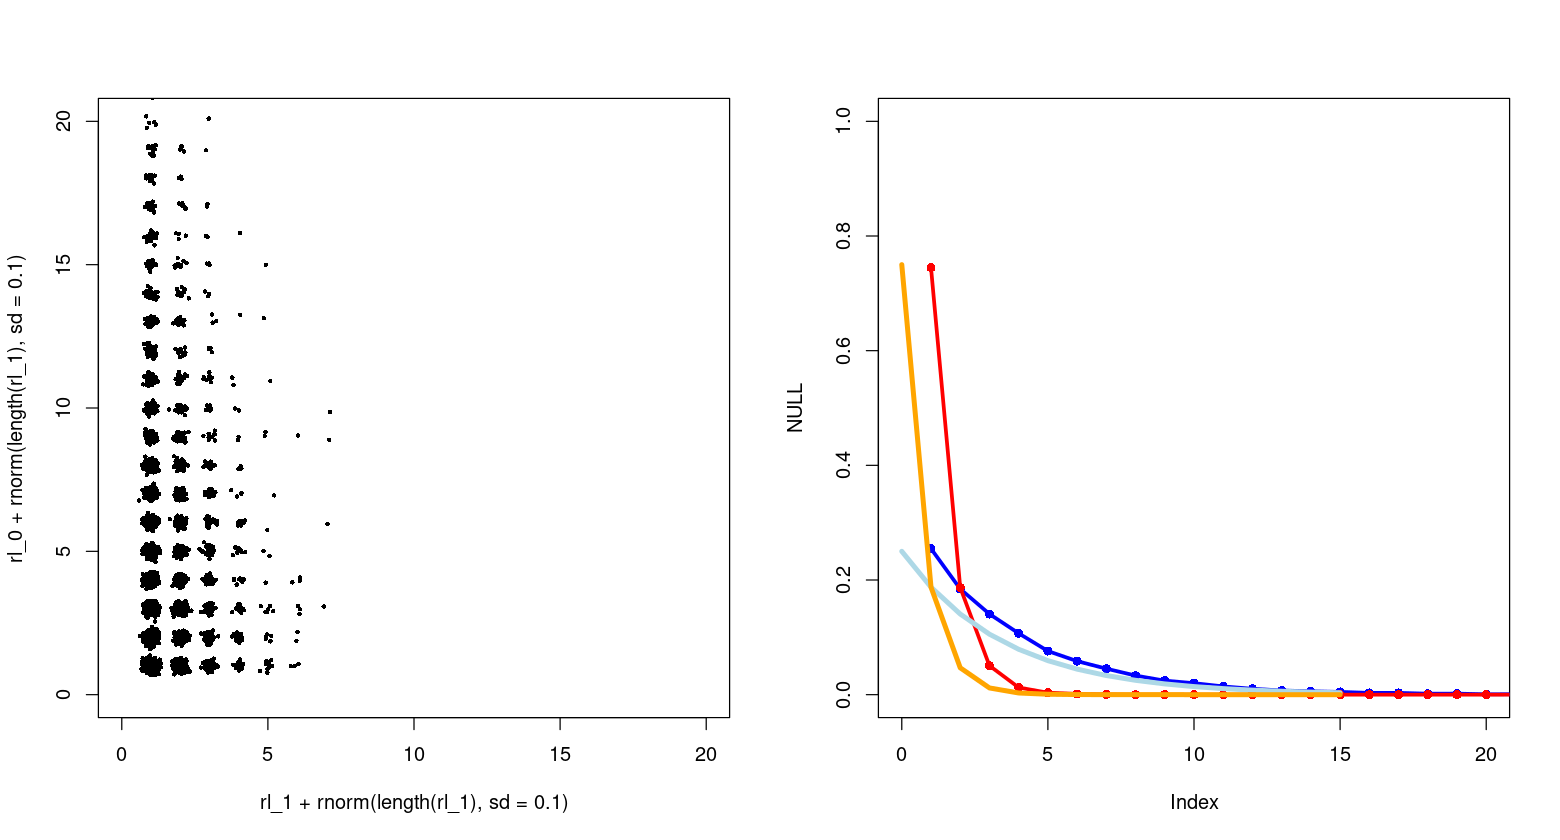

In [186]:
#### bin_seq <- rbinom(n=50000,size=1,prob=0.25)
rl <- run_lengths(bin_seq)
min_len <- min(length(rl$run_lengths_1),length(rl$run_lengths_0))
rl_1 <- rl$run_lengths_1[1:min_len]
rl_0 <- rl$run_lengths_0[1:min_len]

options(repr.plot.width=13)
layout(matrix(1:2,byrow=T,ncol=2))
plot(rl_1+rnorm(length(rl_1),sd=0.1),
     rl_0+rnorm(length(rl_1),sd=0.1),
     xlim=c(0,20),ylim=c(0,20),pch=16,cex=0.5,col='#000000')
plot(NULL,xlim=c(0,20),ylim=c(0,1))
brks <- seq(0.5,100.5,1)
hist(rl_0,breaks=brks,plot=F)->ht0
hist(rl_1,breaks=brks,plot=F)->ht1
lines(ht0$mids,ht0$density,col='blue',lwd=3,type='o',pch=16)
lines(ht1$mids,ht1$density,col='red',lwd=3,type='o',pch=16)
lines(0:15,dgeom(0:15,prob=0.25),col='lightblue',lwd=4)
lines(0:15,dgeom(0:15,prob=0.75),col='orange',lwd=4)

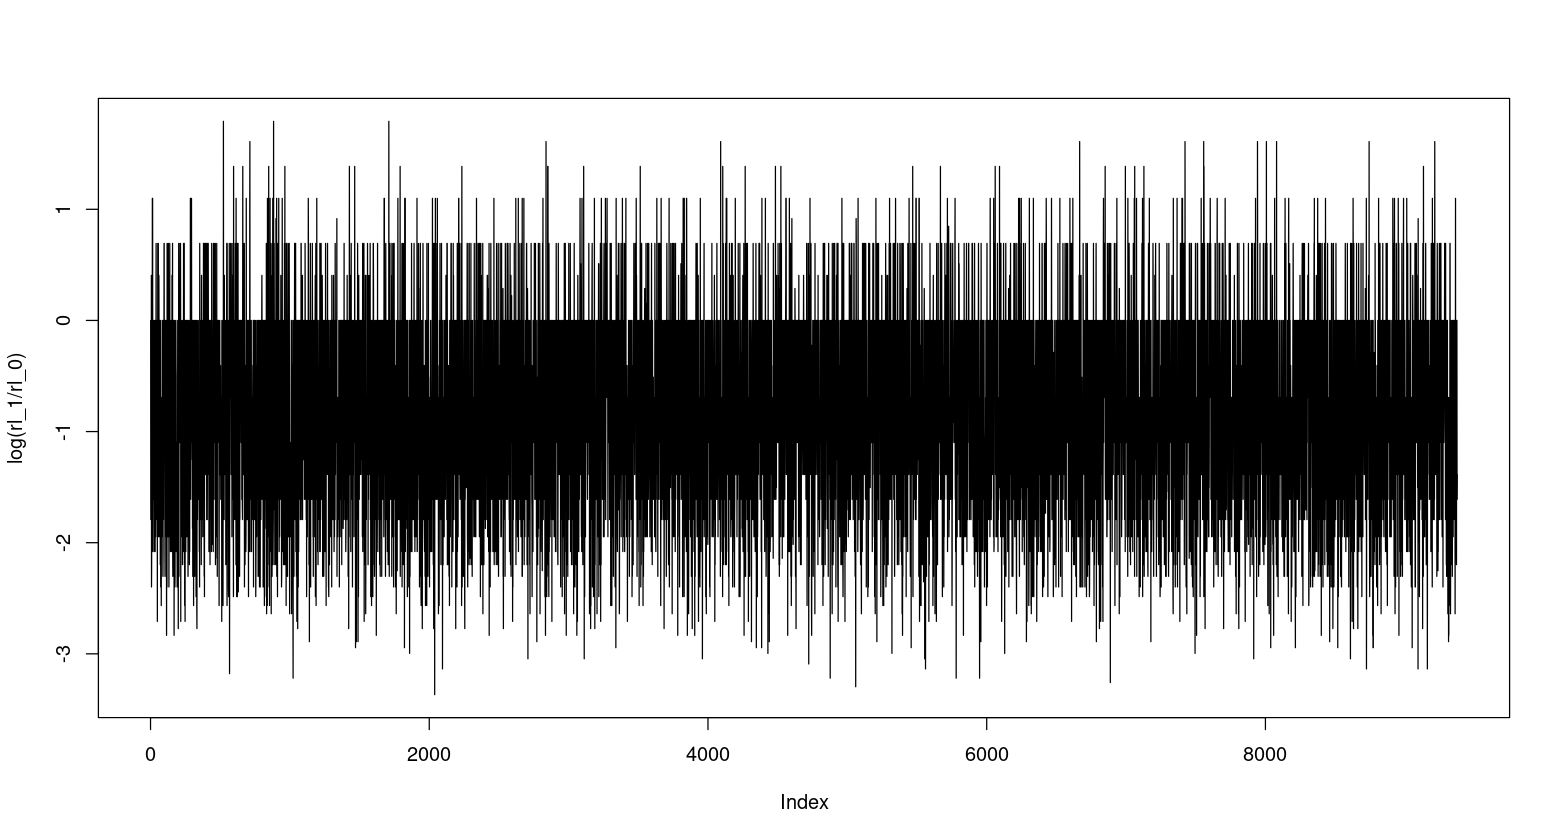

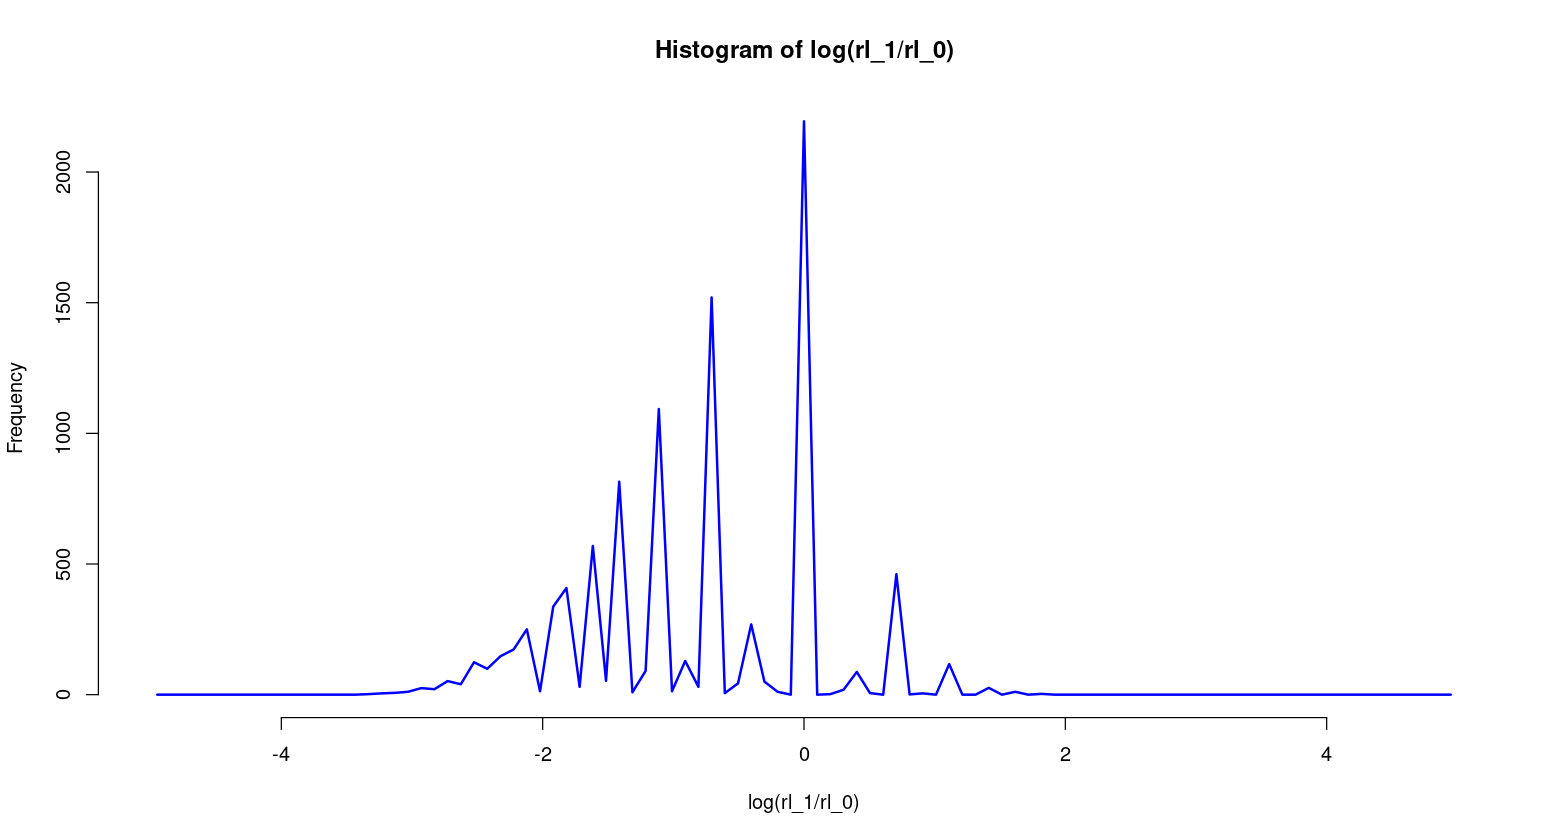

In [193]:
plot(log(rl_1/rl_0),type='l')
hist(log(rl_1/rl_0),breaks=seq(-5,5,length.out = 100),col='#ffffff',border=NA)->ht
lines(ht$mids,ht$counts,col='blue',lwd=2)